In [76]:
# Programmer Name: Ben Boda
# Date: 2/22/2025
# Purpose: Using this project as practice with an artificial neural network (ANN)

In [77]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import sklearn

In [78]:
df = pd.read_csv("D:\Data Stuff\GitHub\CustomerChurnProject\Telco-Customer-Churn.csv")

<>:1: SyntaxWarning: invalid escape sequence '\D'
<>:1: SyntaxWarning: invalid escape sequence '\D'
C:\Users\Ben\AppData\Local\Temp\ipykernel_105160\2422069754.py:1: SyntaxWarning: invalid escape sequence '\D'
  df = pd.read_csv("D:\Data Stuff\GitHub\CustomerChurnProject\Telco-Customer-Churn.csv")


## Preliminary EDA

This portion of the code is exploratory data analysis (EDA). It is used to explore the data and get an understanding of the types, size, and even biases of the data. It helps to identify weighting of the data and underlying patterns that might be present. It also allows us to see errors and outliers in the data. This helps us know which models will be most effective for a given prediction task.

In [79]:
df.head(10)

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes
5,9305-CDSKC,Female,0,No,No,8,Yes,Yes,Fiber optic,No,...,Yes,No,Yes,Yes,Month-to-month,Yes,Electronic check,99.65,820.5,Yes
6,1452-KIOVK,Male,0,No,Yes,22,Yes,Yes,Fiber optic,No,...,No,No,Yes,No,Month-to-month,Yes,Credit card (automatic),89.10,1949.4,No
7,6713-OKOMC,Female,0,No,No,10,No,No phone service,DSL,Yes,...,No,No,No,No,Month-to-month,No,Mailed check,29.75,301.9,No
8,7892-POOKP,Female,0,Yes,No,28,Yes,Yes,Fiber optic,No,...,Yes,Yes,Yes,Yes,Month-to-month,Yes,Electronic check,104.80,3046.05,Yes
9,6388-TABGU,Male,0,No,Yes,62,Yes,No,DSL,Yes,...,No,No,No,No,One year,No,Bank transfer (automatic),56.15,3487.95,No


In [80]:
df.drop("customerID", axis=1, inplace=True)
df.dtypes

gender               object
SeniorCitizen         int64
Partner              object
Dependents           object
tenure                int64
PhoneService         object
MultipleLines        object
InternetService      object
OnlineSecurity       object
OnlineBackup         object
DeviceProtection     object
TechSupport          object
StreamingTV          object
StreamingMovies      object
Contract             object
PaperlessBilling     object
PaymentMethod        object
MonthlyCharges      float64
TotalCharges         object
Churn                object
dtype: object

In [81]:
df["TotalCharges"].values

array(['29.85', '1889.5', '108.15', ..., '346.45', '306.6', '6844.5'],
      dtype=object)

In [82]:
df["MonthlyCharges"].values

array([ 29.85,  56.95,  53.85, ...,  29.6 ,  74.4 , 105.65])

In [83]:
# pd.to_numeric(df["TotalCharges"])

In [84]:
pd.to_numeric(df["TotalCharges"], errors="coerce").isnull()

0       False
1       False
2       False
3       False
4       False
        ...  
7038    False
7039    False
7040    False
7041    False
7042    False
Name: TotalCharges, Length: 7043, dtype: bool

In [85]:
df[pd.to_numeric(df["TotalCharges"], errors="coerce").isnull()]

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
488,Female,0,Yes,Yes,0,No,No phone service,DSL,Yes,No,Yes,Yes,Yes,No,Two year,Yes,Bank transfer (automatic),52.55,,No
753,Male,0,No,Yes,0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,20.25,,No
936,Female,0,Yes,Yes,0,Yes,No,DSL,Yes,Yes,Yes,No,Yes,Yes,Two year,No,Mailed check,80.85,,No
1082,Male,0,Yes,Yes,0,Yes,Yes,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,25.75,,No
1340,Female,0,Yes,Yes,0,No,No phone service,DSL,Yes,Yes,Yes,Yes,Yes,No,Two year,No,Credit card (automatic),56.05,,No
3331,Male,0,Yes,Yes,0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,19.85,,No
3826,Male,0,Yes,Yes,0,Yes,Yes,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,25.35,,No
4380,Female,0,Yes,Yes,0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,20.00,,No
5218,Male,0,Yes,Yes,0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,One year,Yes,Mailed check,19.70,,No
6670,Female,0,Yes,Yes,0,Yes,Yes,DSL,No,Yes,Yes,Yes,Yes,No,Two year,No,Mailed check,73.35,,No


In [86]:
df.shape

(7043, 20)

In [87]:
df.iloc[488]["TotalCharges"]

' '

In [88]:
df1 = df[df["TotalCharges"] != " "]

In [89]:
df1.shape

(7032, 20)

In [90]:
df1.dtypes

gender               object
SeniorCitizen         int64
Partner              object
Dependents           object
tenure                int64
PhoneService         object
MultipleLines        object
InternetService      object
OnlineSecurity       object
OnlineBackup         object
DeviceProtection     object
TechSupport          object
StreamingTV          object
StreamingMovies      object
Contract             object
PaperlessBilling     object
PaymentMethod        object
MonthlyCharges      float64
TotalCharges         object
Churn                object
dtype: object

In [91]:
df1["TotalCharges"] = pd.to_numeric(df1["TotalCharges"])

C:\Users\Ben\AppData\Local\Temp\ipykernel_105160\695212587.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1["TotalCharges"] = pd.to_numeric(df1["TotalCharges"])


In [92]:
df1.dtypes

gender               object
SeniorCitizen         int64
Partner              object
Dependents           object
tenure                int64
PhoneService         object
MultipleLines        object
InternetService      object
OnlineSecurity       object
OnlineBackup         object
DeviceProtection     object
TechSupport          object
StreamingTV          object
StreamingMovies      object
Contract             object
PaperlessBilling     object
PaymentMethod        object
MonthlyCharges      float64
TotalCharges        float64
Churn                object
dtype: object

In [93]:
df1[df1["Churn"] == "No"]["tenure"]

0        1
1       34
3       45
6       22
7       10
        ..
7037    72
7038    24
7039    72
7040    11
7042    66
Name: tenure, Length: 5163, dtype: int64

In [94]:
NonChurnTenure = df1[df1["Churn"] == "No"]["tenure"]
ChurnTenure = df1[df1["Churn"] == "Yes"]["tenure"]

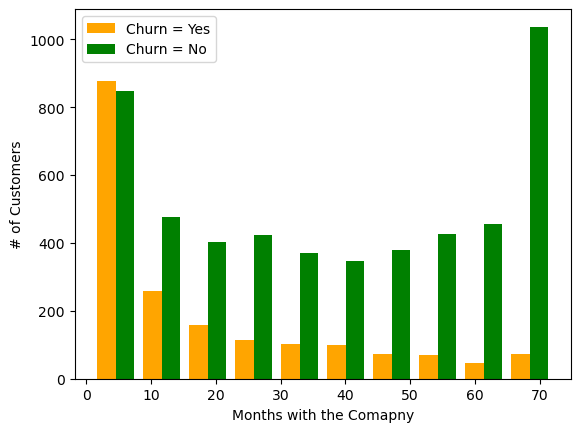

In [95]:
plt.xlabel("Months with the Comapny")
plt.ylabel("# of Customers")
plt.hist([ChurnTenure, NonChurnTenure], color = ["orange", "green"], label = ["Churn = Yes", "Churn = No"])
plt.legend()

##### Visual Interpretation

This visualization shows that fresh customers that have been with the company about 5 or 6 months are almost equally as likely to churn (leave the company). The numbers are high for both showing that the company attracts a large amount of customers, however it only keeps about half of them in this crucial preliminary phase. Around 10 months the churn rate begins to soften showing that once the customers have been with this company for a little bit of a longer period, they are more likely to stay then to leave. This could be due to high switching costs, sunk cost fallacy, improved customer service for longer-tenured customers, or a number of other things. As the tenure lengths become longer it is a pretty similar story with churn rates decreasing steadily and then finally in the last data point displayed, a tenure of 70 months, this is where the lowest churn rate exists by far. This could be due to some sort of promotional benefit such as reduced costs for long term customers, loyalty, or just the fact that these customers love this company this much. It is useful information for sales people and customer service because they can try to really support customers who are in the 50-60 month range so that they can get them to the 70 month range, where they will have the highest likelihood of sticking around.

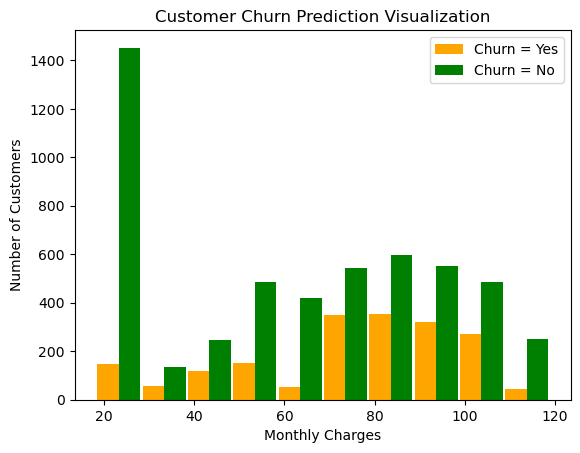

In [96]:
churn_monthlycharges = df1[df1["Churn"] == "Yes"]["MonthlyCharges"]
nonchurn_monthlycharges = df1[df1["Churn"] == "No"]["MonthlyCharges"]

plt.xlabel("Monthly Charges")
plt.ylabel("Number of Customers")
plt.title("Customer Churn Prediction Visualization")

blood_sugar_men = [113, 85, 90, 150, 140, 88, 93, 115, 135, 80, 77, 82, 129]
blood_sugar_women = [67, 98, 89, 120, 133, 150, 84, 69, 89, 79, 120, 112, 100]

plt.hist([churn_monthlycharges, nonchurn_monthlycharges], rwidth = 0.95, color = ["orange", "green"], label = ["Churn = Yes", "Churn = No"])
plt.legend()

In [97]:
def unique_values(df):
    for column in df:
        if df[column].dtype == "object":
            print(f'{column} : {df[column].unique()}')

In [98]:
unique_values(df1)

gender : ['Female' 'Male']
Partner : ['Yes' 'No']
Dependents : ['No' 'Yes']
PhoneService : ['No' 'Yes']
MultipleLines : ['No phone service' 'No' 'Yes']
InternetService : ['DSL' 'Fiber optic' 'No']
OnlineSecurity : ['No' 'Yes' 'No internet service']
OnlineBackup : ['Yes' 'No' 'No internet service']
DeviceProtection : ['No' 'Yes' 'No internet service']
TechSupport : ['No' 'Yes' 'No internet service']
StreamingTV : ['No' 'Yes' 'No internet service']
StreamingMovies : ['No' 'Yes' 'No internet service']
Contract : ['Month-to-month' 'One year' 'Two year']
PaperlessBilling : ['Yes' 'No']
PaymentMethod : ['Electronic check' 'Mailed check' 'Bank transfer (automatic)'
 'Credit card (automatic)']
Churn : ['No' 'Yes']


In [99]:
df1.replace("No internet service", "No", inplace = True)
df1.replace("No phone service", "No", inplace = True)

C:\Users\Ben\AppData\Local\Temp\ipykernel_105160\3144881796.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1.replace("No internet service", "No", inplace = True)
C:\Users\Ben\AppData\Local\Temp\ipykernel_105160\3144881796.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1.replace("No phone service", "No", inplace = True)


In [100]:
unique_values(df1)

gender : ['Female' 'Male']
Partner : ['Yes' 'No']
Dependents : ['No' 'Yes']
PhoneService : ['No' 'Yes']
MultipleLines : ['No' 'Yes']
InternetService : ['DSL' 'Fiber optic' 'No']
OnlineSecurity : ['No' 'Yes']
OnlineBackup : ['Yes' 'No']
DeviceProtection : ['No' 'Yes']
TechSupport : ['No' 'Yes']
StreamingTV : ['No' 'Yes']
StreamingMovies : ['No' 'Yes']
Contract : ['Month-to-month' 'One year' 'Two year']
PaperlessBilling : ['Yes' 'No']
PaymentMethod : ['Electronic check' 'Mailed check' 'Bank transfer (automatic)'
 'Credit card (automatic)']
Churn : ['No' 'Yes']


##### One-Hot Encoding

The one-hot encoding technique is used to convert categorical features into 1s or 0s, such as True and False or Yes and No. Converting these types of features to this format allows a model to calibrate based on them effectively. It can weigh whether having a dog makes you more likely to go to the park or not. In the data a 1 would appear in the dog category and it would calculate if this 1 is highly related to the outcome of someone going to the park or not.

In [101]:
encode_columns = ["Partner", "Dependents", "PhoneService", "MultipleLines", "OnlineSecurity", "OnlineBackup", "DeviceProtection", "TechSupport", "StreamingTV", "StreamingMovies", "PaperlessBilling", "Churn"]

In [102]:
for col in encode_columns:
    df1[col].replace({"Yes": 1, "No": 0}, inplace = True)

C:\Users\Ben\AppData\Local\Temp\ipykernel_105160\3010871562.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df1[col].replace({"Yes": 1, "No": 0}, inplace = True)
C:\Users\Ben\AppData\Local\Temp\ipykernel_105160\3010871562.py:2: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df1[col].replace({"Yes

In [103]:
for col in df1:
    print(f'{col}: {df1[col].unique()}')

gender: ['Female' 'Male']
SeniorCitizen: [0 1]
Partner: [1 0]
Dependents: [0 1]
tenure: [ 1 34  2 45  8 22 10 28 62 13 16 58 49 25 69 52 71 21 12 30 47 72 17 27
  5 46 11 70 63 43 15 60 18 66  9  3 31 50 64 56  7 42 35 48 29 65 38 68
 32 55 37 36 41  6  4 33 67 23 57 61 14 20 53 40 59 24 44 19 54 51 26 39]
PhoneService: [0 1]
MultipleLines: [0 1]
InternetService: ['DSL' 'Fiber optic' 'No']
OnlineSecurity: [0 1]
OnlineBackup: [1 0]
DeviceProtection: [0 1]
TechSupport: [0 1]
StreamingTV: [0 1]
StreamingMovies: [0 1]
Contract: ['Month-to-month' 'One year' 'Two year']
PaperlessBilling: [1 0]
PaymentMethod: ['Electronic check' 'Mailed check' 'Bank transfer (automatic)'
 'Credit card (automatic)']
MonthlyCharges: [29.85 56.95 53.85 ... 63.1  44.2  78.7 ]
TotalCharges: [  29.85 1889.5   108.15 ...  346.45  306.6  6844.5 ]
Churn: [0 1]


In [104]:
df1["gender"].replace({"Female": 1, "Male": 0}, inplace = True)

C:\Users\Ben\AppData\Local\Temp\ipykernel_105160\413956997.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df1["gender"].replace({"Female": 1, "Male": 0}, inplace = True)
C:\Users\Ben\AppData\Local\Temp\ipykernel_105160\413956997.py:1: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df1["gender"].

In [105]:
df2 = pd.get_dummies(data = df1, columns = ["InternetService", "Contract", "PaymentMethod"])

##### Min-Max Scaling

The purpose of this scaling technique is to prepare the data on a scale that allows the machine learning model to process it effectively. By using this technique, all of the data points from different features are on the same scale and the model can compare the different features effectively against each other. 

In [106]:
cols_to_scale = ["tenure", "MonthlyCharges", "TotalCharges"]
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()

df2[cols_to_scale] = scaler.fit_transform(df2[cols_to_scale]) # scaling these columns to a 0 to 1 scale
df2.sample(5)

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,OnlineSecurity,OnlineBackup,DeviceProtection,...,InternetService_DSL,InternetService_Fiber optic,InternetService_No,Contract_Month-to-month,Contract_One year,Contract_Two year,PaymentMethod_Bank transfer (automatic),PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
6807,0,0,1,1,0.070423,1,0,0,0,0,...,False,False,True,False,False,True,False,True,False,False
4356,1,0,0,0,0.028169,1,0,0,0,0,...,False,False,True,True,False,False,False,False,False,True
871,0,0,1,1,0.788732,1,0,0,1,1,...,False,True,False,False,True,False,False,True,False,False
6658,0,1,0,0,0.366197,1,1,0,1,0,...,False,True,False,True,False,False,False,False,True,False
1383,1,0,0,0,0.000000,1,1,0,0,0,...,True,False,False,True,False,False,True,False,False,False


## Train-Test Split

This portion of the code will be the training-testing split. This is used to break the data up into subsets that will be used for training and testing. The model is built on the training set which is part of the existing data and then that model is ran on the testing set to "test" the accuracy of the model. Both subsets are coming from the same dataset, but this allows the model to be tested on data it hasn't seen before to determine how applicable it will be on new unseen data. It is useful when you need a quick test of model performance as well as when the data is large and diverse. It can be ineffective in a small data set that may be prone to bias and unbalanced. A standard procedure is an 80/20 split where 80% of the data is used for training and 20% is used for testing. 

In [107]:
X = df2.drop("Churn", axis = 1)
y = df2["Churn"]

In [108]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 5)
X_train.shape

(5625, 26)

In [109]:
X_test.shape # 5625 is 80%, 1407 is 20% demonstrating a good split for training and testing

(1407, 26)

In [110]:
X_train[0:10]

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,OnlineSecurity,OnlineBackup,DeviceProtection,...,InternetService_DSL,InternetService_Fiber optic,InternetService_No,Contract_Month-to-month,Contract_One year,Contract_Two year,PaymentMethod_Bank transfer (automatic),PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
5664,1,1,0,0,0.126761,1,0,0,0,1,...,False,True,False,True,False,False,False,True,False,False
101,1,0,1,1,0.000000,1,0,0,0,0,...,False,False,True,True,False,False,False,False,True,False
2621,0,0,1,0,0.985915,1,0,0,1,1,...,True,False,False,False,False,True,False,True,False,False
392,1,1,0,0,0.014085,1,0,0,0,0,...,True,False,False,True,False,False,False,False,True,False
1327,0,0,1,0,0.816901,1,1,0,0,1,...,False,True,False,False,True,False,True,False,False,False
3607,1,0,0,0,0.169014,1,0,1,0,0,...,True,False,False,False,True,False,False,False,False,True
2773,0,0,1,0,0.323944,0,0,0,0,1,...,True,False,False,True,False,False,False,False,True,False
1936,1,0,1,0,0.704225,1,0,1,1,0,...,True,False,False,False,True,False,True,False,False,False
5387,0,0,0,0,0.042254,0,0,0,0,0,...,True,False,False,True,False,False,False,False,True,False
4331,0,0,0,0,0.985915,1,1,0,0,0,...,False,False,True,False,False,True,True,False,False,False


In [111]:
len(X_train.columns)

26

## Building the Model

For this analysis we use an artificial neural network (ANN). More specifically a binary classification neural network using Keras. This is a type of neural network that classifies the data into customers who churned (left) or didn't churn. At the end it can be used to predict whether someone will churn or not based just on the data it is given.

In [112]:
import tensorflow as tf
from tensorflow import keras

In [113]:
model = keras.Sequential([
    keras.layers.Dense(20, input_shape = (26,), activation = "relu"), 
    keras.layers.Dense(1, activation = "sigmoid"),
])

model.compile(optimizer = "adam",
              loss = "binary_crossentropy",
              metrics = ["accuracy"])

model.fit(X_train, y_train, epochs = 100)

d:\Data Stuff\CondaEnvs\CustomerChurnProject\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/100
176/176 ━━━━━━━━━━━━━━━━━━━━ 1s 583us/step - accuracy: 0.7383 - loss: 0.5273
Epoch 2/100
176/176 ━━━━━━━━━━━━━━━━━━━━ 0s 578us/step - accuracy: 0.7862 - loss: 0.4393
Epoch 3/100
176/176 ━━━━━━━━━━━━━━━━━━━━ 0s 592us/step - accuracy: 0.7973 - loss: 0.4242
Epoch 4/100
176/176 ━━━━━━━━━━━━━━━━━━━━ 0s 588us/step - accuracy: 0.8088 - loss: 0.4036
Epoch 5/100
176/176 ━━━━━━━━━━━━━━━━━━━━ 0s 752us/step - accuracy: 0.7935 - loss: 0.4270
Epoch 6/100
176/176 ━━━━━━━━━━━━━━━━━━━━ 0s 655us/step - accuracy: 0.8027 - loss: 0.4170
Epoch 7/100
176/176 ━━━━━━━━━━━━━━━━━━━━ 0s 612us/step - accuracy: 0.8031 - loss: 0.4256
Epoch 8/100
176/176 ━━━━━━━━━━━━━━━━━━━━ 0s 620us/step - accuracy: 0.8062 - loss: 0.4144
Epoch 9/100
176/176 ━━━━━━━━━━━━━━━━━━━━ 0s 588us/step - accuracy: 0.8071 - loss: 0.4109
Epoch 10/100
176/176 ━━━━━━━━━━━━━━━━━━━━ 0s 613us/step - accuracy: 0.8104 - loss: 0.4055
Epoch 11/100
176/176 ━━━━━━━━━━━━━━━━━━━━ 0s 647us/step - accuracy: 0.8084 - loss: 0.3977
Epoch 12/100
176/17

##### Notes from model architecture ^

- Calling keras.Sequential makes the model have a linear sequential architecture where each layer is happening after the previous one rather than at the same time
- keras.layers.Dense(20, input_shape = (26,), acitvation = "relu") makes the first layer
    - 20 is the number of neurons that will be used for the network, the first layer is fully connected with these 20 neurons
    - Input shape is 26 meaning the dataset has 26 features
    - ReLU as the activation function means it uses Rectified Linear Unit as the activation function which mathematically is: ReLU(x) = max(0, x)
        - This means if the input is positive it returns that value, if it is zero or negative it returns 0
        - Need more experience to fully understand what the activation function does
- keras.layers.Dense(1, activation = "sigmoid") is the second layer of the network
    - it is a fully connected layer with 1 output neuron
    - it uses sigmoid activation which outputs a value between 0 and 1 (a probability of the predicted outcome)

- model.compile
    - optimizer = "adam" (Adaptive Moment Estimation)
        - this is a gradient descent method that is adaptive
        - it keeps track of the average of past gradients (momentum)
        - it adjusts the learning rates differently for each parameter based on the past behavior (adaptive)
    - loss = "binary_crossentropy"
        - this is the loss function, what we are trying to minimize
        - Loss = -[ylog(p) + (1 - y)log(1 - p)]
        - y = actual label (0 or 1)
        - p = predicted probability from the model
        - interpretation: the closer p is to y the smaller the loss
    - metrics = ["accuracy"]
        - tells keras to track accuracy during training and eval
        - accuracy = percentager of correct predictions
        - for binary classification a prediction > 0.5 is treated as class 1 otherwise class 0, if it is == 0.5 then it depends on the setting determined when building the model, default is class 1

- epochs are the number of full passes through the training set, 1 epoch the model will see every data point once, 2 epochs twice and so on

In [114]:
model.evaluate(X_test, y_test)

44/44 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.7987 - loss: 0.4333


[0.4480923116207123, 0.7860696315765381]

In [115]:
yp = model.predict(X_test)
yp[: 5]

44/44 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step


array([[0.23979327],
       [0.36243352],
       [0.01715546],
       [0.7870928 ],
       [0.36553887]], dtype=float32)

In [119]:
y_test[: 10]

2660    0
744     0
5579    1
64      1
3287    1
816     1
2670    0
5920    0
1023    0
6087    0
Name: Churn, dtype: int64

###### classifying the data into 1 or 0 based on prediction probability

In [117]:
y_pred = []
for pred in yp:
    if pred > 0.5:
        y_pred.append(1)
    else:
        y_pred.append(0)

In [118]:
y_pred[: 10]

[0, 0, 0, 1, 0, 1, 0, 0, 0, 0]

##### Model Metrics

In [120]:
from sklearn.metrics import confusion_matrix, classification_report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.82      0.90      0.86       999
           1       0.67      0.52      0.58       408

    accuracy                           0.79      1407
   macro avg       0.74      0.71      0.72      1407
weighted avg       0.78      0.79      0.78      1407



##### Explanations of Each Metric ^



Text(95.72222222222221, 0.5, 'Truth')

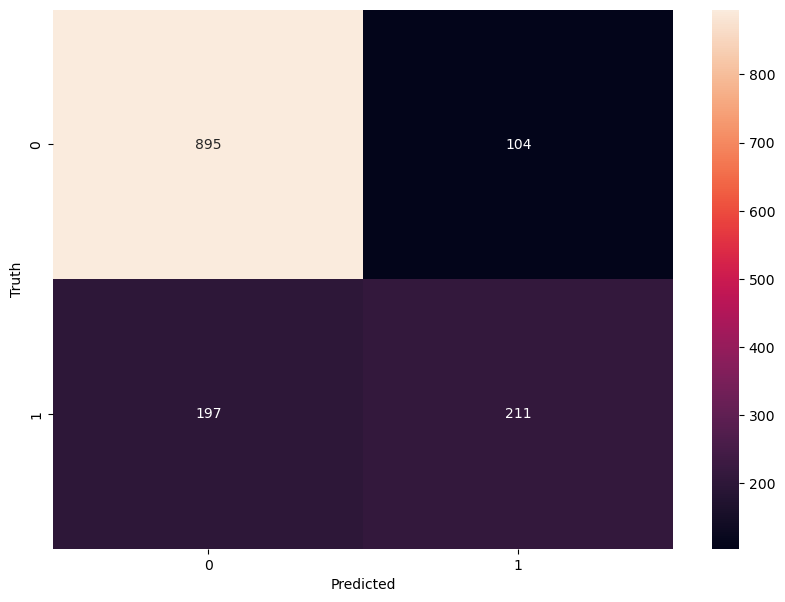

In [123]:
import seaborn as sn
cm = tf.math.confusion_matrix(labels = y_test, predictions = y_pred)

plt.figure(figsize = (10, 7))
sn.heatmap(cm, annot = True, fmt = "d")
plt.xlabel("Predicted")
plt.ylabel("Truth")